In [19]:
from matplotlib import pyplot as plt 
import matplotlib.colors as mcolors
import numpy as np


### Aux functions to display results


In [1]:
# Plot the training set

def plot_points(points,targets):

    P = np.array_split(points, len(points[0]), axis=1)
    plt.scatter(P[0],P[1], color = ['r', 'g', 'r', 'g'], s = 40)
    plt.plot([-1.5, 1.5],[0,0], [0,0],[-1.5, 1.5], c='black')


# Plot the training set and the line found at an epoch (no bias version)
def plot_points_and_line(points, weight_history, epoch_to_view):
    line = compute_line_points(weight_history, epoch_to_view)
    plt.plot(line[0], line [1])

    P = np.array_split(points, len(points[0]), axis=1)
    plt.scatter(P[0],P[1], color = ['r', 'g', 'r', 'g'], s = 40)
    plt.plot([-1.5, 1.5],[0,0], [0,0],[-1.5, 1.5], c='black')    

def compute_line_points(weight_history, epoch_to_view):

    a = weight_history[epoch_to_view][0]
    b = weight_history[epoch_to_view][1]
    l = np.sqrt(a*a + b*b)
    a = a/l
    b = b/l
    if (a > b):
        bottomY = -2
        bottomX = -(-2 * b)/a
        topY = 2
        topX = -(2 * b)/a
    
    else :
        bottomX = -2
        bottomY = -(-2 * a)/b
        topX = 2
        topY = -(2 * a)/b

    return([bottomX, topX], [bottomY, topY])

    
# Plot the training set and the line found at an epoch (with bias)

def plot_points_and_line_2(points, weight_history, epoch_to_view):
    line = compute_line_points_2(weight_history, epoch_to_view)
    plt.plot(line[0], line [1])

    P = np.array_split(points, len(points[0]), axis=1)
    plt.scatter(P[0],P[1], color = ['r', 'g', 'r', 'g'], s = 40)
    plt.plot([-1.5, 1.5],[0,0], [0,0],[-1.5, 1.5], c='black')    
    
def compute_line_points_2(weight_history, epoch_to_view):

    a = weight_history[epoch_to_view][0]
    b = weight_history[epoch_to_view][1]
    c = weight_history[epoch_to_view][2]

    #l = np.sqrt(a*a + b*b)
    #a = a/l
    #b = b/l
    if (a > b):
        bottomY = -2
        bottomX = -(-2 * b + c)/a
        topY = 2
        topX = -(2 * b + c)/a
    
    else :
        bottomX = -2
        bottomY = -(-2 * a + c)/b
        topX = 2
        topY = -(2 * a + c)/b

    return([bottomX, topX], [bottomY, topY])
    



### The dataset

The inputs are the 2D coordinates of the points in the graph below. The outputs are as follows:

* red: -1
* blue: 1

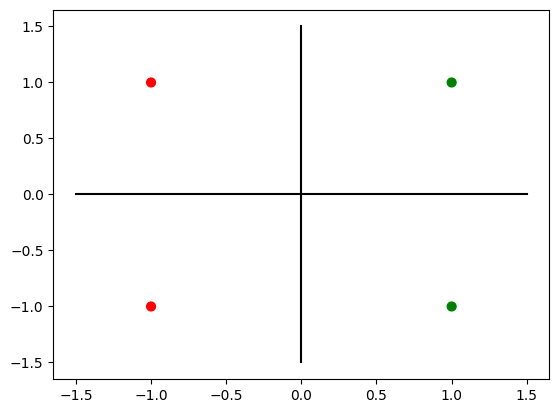

In [21]:
points = np.asarray([[-1,-1],[1,1],[-1,1], [1,-1]])
targets = np.asarray([-1, 1, -1, 1])

plot_points(points,targets)


### The model

A very simple model: an input layer with two units, and an output layer with a single linear unit


![](images/simple_net.png)

### Getting Initial values for the weights

In [22]:
def init_weights(n):

    return np.random.rand(n)

weights = init_weights(2)
print(weights)    

[0.57050015 0.12822039]


### Predict model outputs for our points

$ \hat{y} = \sum_i W_i * I_i$

In [23]:
def predict(points, weights):

    return np.sum(points * weights, axis = 1)

print(predict(points,weights))

[-0.69872054  0.69872054 -0.44227976  0.44227976]


### Loss function

$ Loss(y, \hat{y}) = \frac{1}{2} \sum_i (\hat{y} - y)^2$

where $y$ are the target values and $\hat{y}$ are the model predictions

In [24]:
def loss(output, targets):

    error = np.sum((output - targets)**2) * 0.5
    return error    

### Partial derivatives of the loss relative to the weights

$ \Large \frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial W_i} = \large (\hat{y} - y) \times I_i$

In [25]:
def partial_derivatives(output, points,targets):

        return points * (outputs - targets)

### Compute the gradients

In [26]:
def compute_grads(outputs, points, targets):

    grad = np.zeros(len(points[0]))
    for i in range(len(points)):
        for k in range (len(points[0])):
            grad[k] +=  (outputs[i] - targets[i]) * points[i][k]
       
    return grad

### Testing

In [27]:

outputs = predict(points, weights)
error = loss(outputs, targets)
grads = compute_grads(outputs, points, targets)
print(outputs, error, grads)

[-0.69872054  0.69872054 -0.44227976  0.44227976] 0.40182117789074856 [-1.7179994   0.51288154]


### Running gradient descent

In [28]:
def train(epochs, points, targets, print_iter = True):
    
    weights = init_weights(len(points[0]))
    print('initial weights: ', weights)


    learning_rate = 0.1

    weight_history = [np.copy(weights)]
    errors = []

    for i in range(epochs):

        outputs = predict(points,weights)
        error = loss(outputs, targets)
        errors.append(error)
        grads = compute_grads(outputs, points, targets)

        weights -= grads * learning_rate
        weight_history.append(np.copy(weights))

        if print_iter:
            print('error: ', error,  ' weights: ', weights)

    return weight_history, errors

weight_history, errors = train(10, points, targets)

initial weights:  [0.06287524 0.36995526]
error:  2.0301394235931483  weights:  [0.43772514 0.22197315]
error:  0.7308501924935334  weights:  [0.66263509 0.13318389]
error:  0.2631060692976719  weights:  [0.79758105 0.07991034]
error:  0.0947181849471619  weights:  [0.87854863 0.0479462 ]
error:  0.03409854658097829  weights:  [0.92712918 0.02876772]
error:  0.01227547676915219  weights:  [0.95627751 0.01726063]
error:  0.004419171636894785  weights:  [0.9737665  0.01035638]
error:  0.001590901789282125  weights:  [0.9842599  0.00621383]
error:  0.0005727246441415643  weights:  [0.99055594 0.0037283 ]
error:  0.00020618087189096403  weights:  [0.99433356 0.00223698]


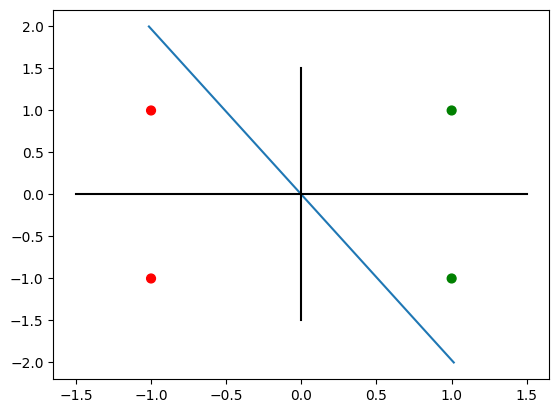

In [29]:
epoch_to_view = 1
plot_points_and_line(points, weight_history, epoch_to_view)

### Introducing Bias Weights

The line equation so far is given by

$W_o * I_0 + W_1 * I_1 = 0$

This represents a line that goes through the origin, which may not be sufficient to separate a linearly separable dataset.

Lets consider another dataset, as shown in the graph below.

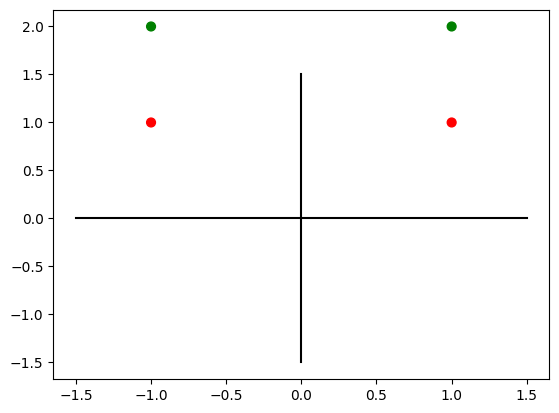

In [30]:
points_2 = np.asarray([[-1, 1],[-1,2],[1,1], [1,2]])
targets = np.asarray([-1, 1, -1, 1])

plot_points(points_2,targets)

##### Training with the new data set

initial weights:  [0.5878268  0.91272418]
error:  5.030959496465135  weights:  [0.35269608 0.2       ]
error:  2.0487890459849476  weights:  [0.21161765 0.2       ]
error:  1.889564056554581  weights:  [0.12697059 0.2       ]
error:  1.8322430603596493  weights:  [0.07618235 0.2       ]
error:  1.8116075017294735  weights:  [0.04570941 0.2       ]
error:  1.8041787006226104  weights:  [0.02742565 0.2       ]
error:  1.8015043322241397  weights:  [0.01645539 0.2       ]
error:  1.8005415596006902  weights:  [0.00987323 0.2       ]
error:  1.8001949614562485  weights:  [0.00592394 0.2       ]
error:  1.8000701861242494  weights:  [0.00355436 0.2       ]


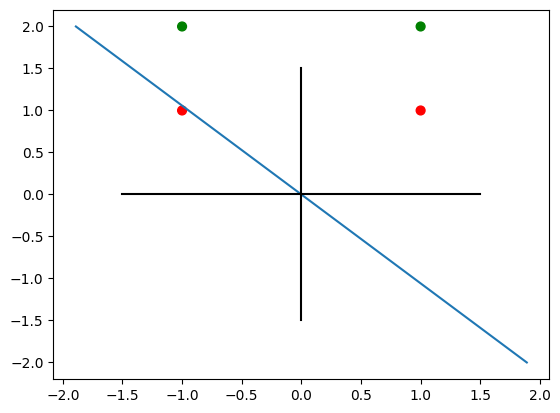

In [31]:
weight_history_2, errors_2 = train(10, points_2, targets)

epoch_to_view = 2
plot_points_and_line(points_2, weight_history_2, epoch_to_view)

Form the graph above it is clear that a line that passes through the origin is not sufficient to separate the green from the red points.

The general line equation is

$Ax + By + C = 0$

The model below implements such an equation

![](images/simple_net_with_bias.png)

The output is now computed as

$ \hat{y_k} = W_0 * I_0 + W_1 * I_1 + b$

The equation $W_0 * I_0 + W_1 * I_1 + b = 0$ represents the line whose coeffients are given by the weights and bias.


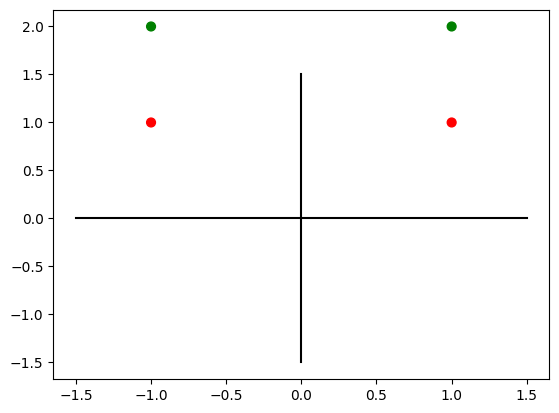

In [32]:
# these are the same points, we just added the bias coefficent, which is always 1

points_3 = np.asarray([[-1, 1, 1],[-1,2, 1],[1,1, 1], [1,2, 1]])

plot_points(points_3,targets)

#### Training the new model

In [33]:
weight_history_3, errors_3 = train(50, points_3, targets, print_iter=False)


initial weights:  [0.67552319 0.65481497 0.53304678]


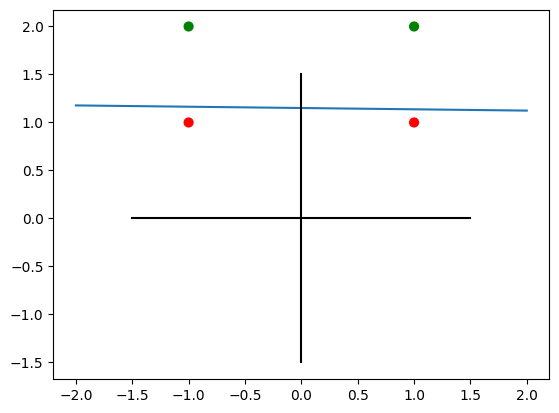

In [34]:

epoch_to_view = 9
plot_points_and_line_2(points_3, weight_history_3, epoch_to_view)

#### Plotting the error evolution

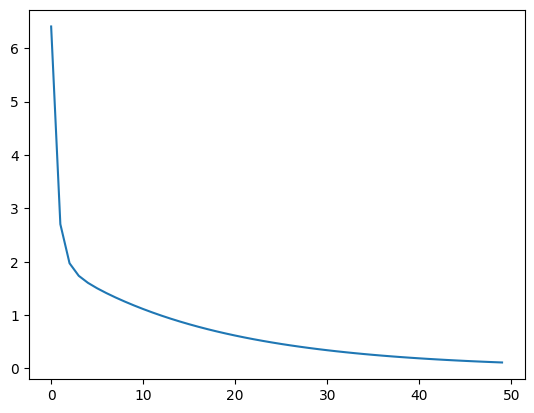

In [35]:
plt.plot(errors_3)

#### Plotting the heat map

-2.1154751603057487 (100, 100)


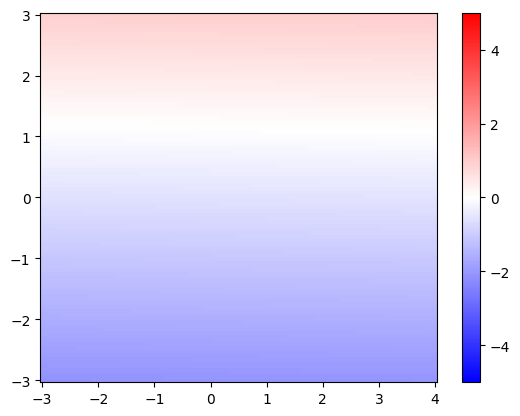

In [36]:
x = np.linspace(-3,4, 100)
y = np.linspace(-3,3, 100)

z = np.asarray([[np.sum([xx,yy,1] * weight_history_3[epoch_to_view]) for xx in x] for yy in y])
print(z[0][0], z.shape)
#norm = mcolors.TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)
plt.pcolor(x,y,z, cmap='bwr', vmin=-5, vmax=5)
plt.colorbar()
